In [ ]:
# matplotlib
# seaborn

# Matplotlib (part 1)

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Matplotlib anatomy

### 1.1. Overview
- Một plot hoàn thiện được gọi là một `Figure`
- Mỗi `Figure` chứa một hoặc nhiều `Axes`.
- Một `Axes` là một phần area mà một điểm (point) có thể được xác định thông qua tọa độ.
    - x, y với 2D plots
    - x, y, z với 3D plots
    - theta, r với polar plots
- Trong phần này ta chỉ quan tâm đến 2D plots
- Mỗi `Axes` chứa các `Axis` (`XAxis` và `YAxis`)
- Mỗi `Axis` chứa các thành phần liên quan đến trục số như ticks, tick locations, labels, ...

### 1.2. Render các thành phần ở trên

#### Figure

In [35]:
# A blank Figure with no Axes
fig = plt.figure()   # red background to see where the figure is
plt.show()

<Figure size 432x288 with 0 Axes>

#### Axes

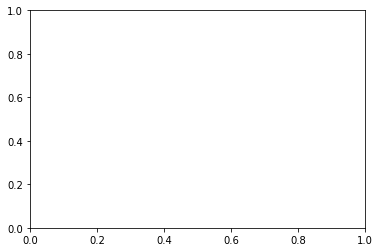

In [36]:
# A Figure with one blank Axes (most common scenario)
fig, ax = plt.subplots()
plt.show()

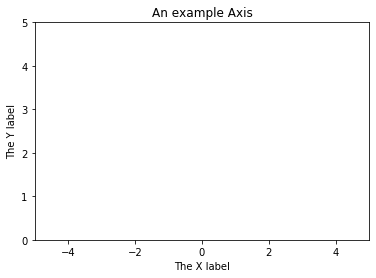

In [37]:
# Add properties to the Axes
fig, ax = plt.subplots()

ax.set(
    xlim=(-5, 5),
    ylim=(0, 5),
    title="An example Axis",
    xlabel="The X label",
    ylabel="The Y label"
)

plt.show()

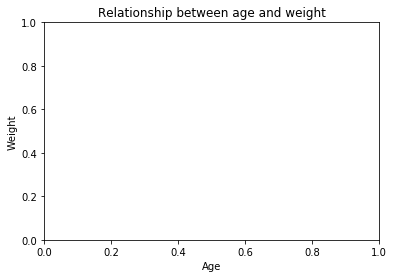

In [44]:
fig, ax = plt.subplots()

ax.set_title("Relationship between age and weight")
ax.set_xlabel("Age")
ax.set_ylabel("Weight")

plt.show()

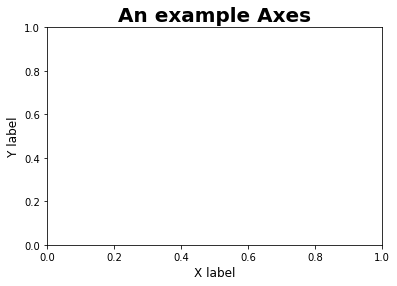

In [6]:
# Another way to set properties
# More typing but more control
fig, ax = plt.subplots()

ax.set_title("An example Axes", fontsize=20, fontweight="bold")
ax.set_xlabel("X label", fontsize=12)
ax.set_ylabel("Y label", fontsize=12)

plt.show()

### 1.3. Simple plotting

In [92]:
# Data
x = np.arange(0, 10) # -5, -4, ... 4, 5
y = x**3 + 1 # y = x^2 + 10
z = x**3 + x + 10

print(x)
print(y)

[0 1 2 3 4 5 6 7 8 9]
[  1   2   9  28  65 126 217 344 513 730]


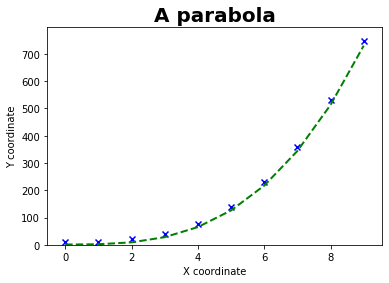

In [94]:
# Create a Figure with one Axes
fig, ax = plt.subplots()

# # Plot data trên Axes
ax.plot(x, y, color="green", linestyle="dashed", linewidth=2) # Default: line plot
ax.scatter(x, z, color="blue", marker="x") # Scatter

# Thêm properties cho Axes
ax.set_title("A parabola", fontweight="bold", fontsize=20)
ax.set_xlabel("X coordinate")
ax.set_ylabel("Y coordinate")
ax.set_ylim(0, None) # Recommend to set lower ylim to 0

plt.show()

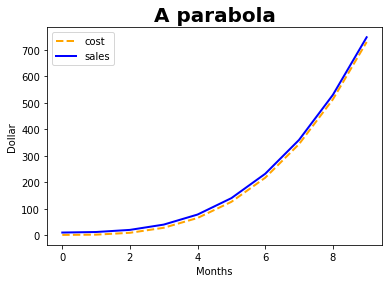

In [100]:
# Create a Figure with one Axes
fig, ax = plt.subplots()

# # Plot data trên Axes
ax.plot(x, y, linestyle="dashed", color="orange", linewidth=2, label="cost") # Default: line plot
ax.plot(x, z, linestyle="solid", color="blue", linewidth=2, label="sales") # Default: line plot

# Thêm properties cho Axes
ax.set_title("A parabola", fontweight="bold", fontsize=20)
ax.set_xlabel("Months")
ax.set_ylabel("Dollar")

plt.legend()
plt.show()

Notes:
    
- More on `marker`: https://matplotlib.org/3.1.1/api/markers_api.html
- More on `linestyle`: https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/linestyles.html

### 1.4. Summary of components of a Figure

<img src="https://matplotlib.org/3.2.1/_images/sphx_glr_anatomy_001.png" style="height: 500px;">

#### Figure

- Plot là the whole `Figure` (coi Figure như là cả container chứa toàn bộ mọi thứ bên trong)
- Trong `Figure` gồm nhiều `Axes` (là phần diện tích nơi mà points có thể xác định qua coordinates)
- Trong mỗi `Axes` có chứa các `Artist` (title, lables, ticks, ...)
- Best practices khi tạo plots:
    ```python
    fig = plt.figure() # An empty Figure with no Axes
    fig, ax = plt.subplots() # A Figure with a single Axes
    fig, axs = plt.subplots(2, 2) # A Figure with a 2x2 grid of 4 Axes
    ```

#### Axes
- Đây chính là một plot.
- Một `Figure` có thể có nhiều `Axes`, nhưng một `Axes` chỉ thuộc một `Figure`.
- Mỗi `Axes` sẽ chứa các `Axis`:
    - 2D `Axes` chứa 2 `Axis` (cho x, y)
    - 3D `Axes` chứa 3 `Axis` (cho x, y, z)
- Tạm thời bài này ta chỉ quan tâm đến 2D plots
- Mỗi `Axes` có thể được set thuộc tính thông qua các phương thức như:
    - `.set_title()`
    - `.set_xlabel()`
    - `.set_ylabel()`
    - `.set_xlim()`
    - `.set_ylim()`
    - ...

## 2. Two common styles and confusion
- Phần này lấy ví dụ vẽ cùng plot bởi 2 styles: OOP và pyplot
- Recommend dùng OOP style
- Sau phần này, các VD đều được trình bày theo OOP style

In [101]:
# Generate data
x = np.linspace(0, 5, 100)
print(len(x))
print(x)

100
[0.         0.05050505 0.1010101  0.15151515 0.2020202  0.25252525
 0.3030303  0.35353535 0.4040404  0.45454545 0.50505051 0.55555556
 0.60606061 0.65656566 0.70707071 0.75757576 0.80808081 0.85858586
 0.90909091 0.95959596 1.01010101 1.06060606 1.11111111 1.16161616
 1.21212121 1.26262626 1.31313131 1.36363636 1.41414141 1.46464646
 1.51515152 1.56565657 1.61616162 1.66666667 1.71717172 1.76767677
 1.81818182 1.86868687 1.91919192 1.96969697 2.02020202 2.07070707
 2.12121212 2.17171717 2.22222222 2.27272727 2.32323232 2.37373737
 2.42424242 2.47474747 2.52525253 2.57575758 2.62626263 2.67676768
 2.72727273 2.77777778 2.82828283 2.87878788 2.92929293 2.97979798
 3.03030303 3.08080808 3.13131313 3.18181818 3.23232323 3.28282828
 3.33333333 3.38383838 3.43434343 3.48484848 3.53535354 3.58585859
 3.63636364 3.68686869 3.73737374 3.78787879 3.83838384 3.88888889
 3.93939394 3.98989899 4.04040404 4.09090909 4.14141414 4.19191919
 4.24242424 4.29292929 4.34343434 4.39393939 4.44444444 4.

### 2.1. OOP style
- Object oriented programming style

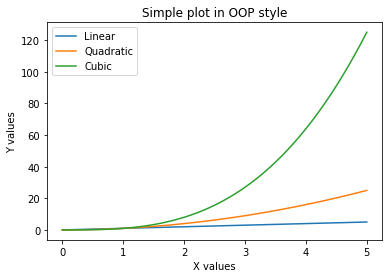

In [109]:
# Make Figure and Axes
fig, ax = plt.subplots()

# Plot data
ax.plot(x, x, label="Linear") # line
ax.plot(x, x**2, label="Quadratic")
ax.plot(x, x**3, label="Cubic")

# Decorate plot
ax.set_xlabel("X values")
ax.set_ylabel("Y values")
ax.set_title("Simple plot in OOP style")
plt.legend() # Show legend

# Show
plt.show()

### 2.2. pyplot style

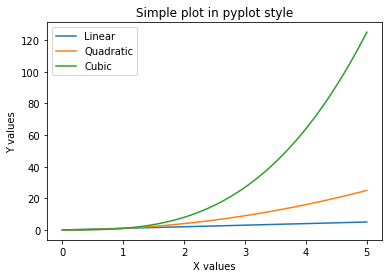

In [120]:
# Plot data (short hand, quick, less flexible, khong hieu ban chat)
plt.plot(x, x, label="Linear")
plt.plot(x, x**2, label="Quadratic")
plt.plot(x, x**3, label="Cubic")

# Decorate plot
plt.xlabel("X values")
plt.ylabel("Y values")
plt.title("Simple plot in pyplot style")
plt.legend() # Show legend

plt.savefig("abc.png", dpi=600) # dots per inch

### 2.3. Which one is better?
- Pyplot style is simpler, but less flexible for complicated plots
- OOP style is more flexible and helps you understand the fundamentals of Matplotlib better, but it requires more typing
- Pick one style and stick with it, don't mix them together
- pyplot style is better for interactive plotting
- OOP style is better for non-interactive plotting (in functions and scripts)

## 3. Matplotlib backend

- *Frontend* (scripting layer): là code mà user viết để specify plots
- *Backend* (backend layer): là cơ chế phía dưới mà Matplotlib dùng để generates actual plots ứng với từng loại output khác nhau. VD:
    - Inline plots in Jupyter Notebook (inline, notebook)
    - PDF files
    - PNG files
    - Widow popup plots
- Backend quy định cách plot được generate và cách người dùng tương tác với plots.
- Có 2 loại backends:
    - User interface backends (or interactive backends): tạo plots trong môi trường interactive như Jupyter (pygtk, wxpython, tkinter, qt4, ...)
    - Hardcopy backends: tạo output file ảnh (png, pdf, svg, ...)
- Để save plots với hardcopy backend, sử dụng `plt.savefig()`

### 3.1. Interactive backend

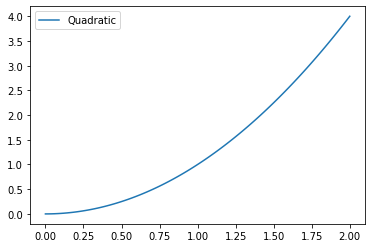

In [12]:
x = np.linspace(0, 2, 100)
plt.plot(x, x**2, label="Quadratic")

plt.legend()
plt.show()

### 3.2. Hardcopy backend

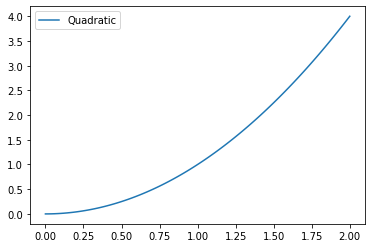

In [13]:
x = np.linspace(0, 2, 100)
plt.plot(x, x**2, label="Quadratic")

plt.legend() # Show legend
plt.savefig("quadratic.png", dpi=600, bbox_inches="tight") # Save PNG
plt.savefig("quadratic.pdf", dpi=600, bbox_inches="tight") # Save PDF

## 4. Multi-subplots in one Figure

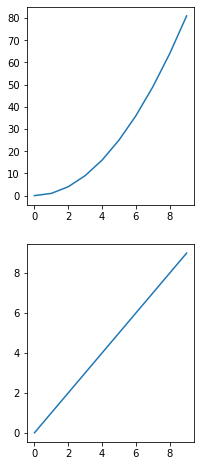

In [149]:
fig, ax = plt.subplots(2, 1, figsize=(3, 8))

ax[0].plot(x, x**2)
ax[1].plot(x, x)

plt.show()

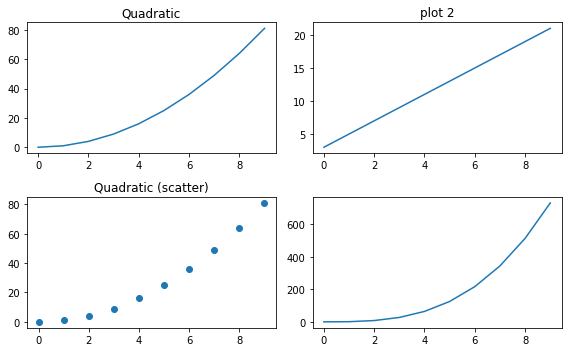

In [139]:
fig, ax = plt.subplots(2, 2, figsize=(8, 5))

# Plot 1
ax[0, 0].plot(x, x ** 2)
ax[0, 0].set_title("Quadratic")

# Plot 2
ax[0, 1].plot(x, 2*x + 3)
ax[0, 1].set_title("plot 2")

# Plot 3
ax[1, 0].scatter(x, x**2)
ax[1, 0].set_title("Quadratic (scatter)")

ax[1, 1].plot(x, x**3 + 1)

plt.tight_layout()

plt.savefig("multi-plot.png", dpi=600)
plt.show()

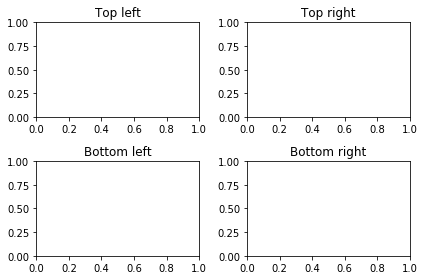

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=2) # Grid 2x2 = 4 plots

axes[0, 0].set_title("Top left")
axes[0, 1].set_title("Top right")
axes[1, 0].set_title("Bottom left")
axes[1, 1].set_title("Bottom right")

# Avoid overlapping labels 
fig.tight_layout() # try commenting this

plt.show()

### Example 1

In [20]:
# X data
x = np.linspace(0, 10, 100)

y1 = np.cos(x)
y2 = np.cos(x + 1)
y3 = np.cos(x + 2)

y_data =[]
y_data.append(np.cos(x))
y_data.append(np.cos(x + 1))
y_data.append(np.cos(x + 2))

# Titles
titles = ["Signal 1", "Signal 2", "Signal 3"]

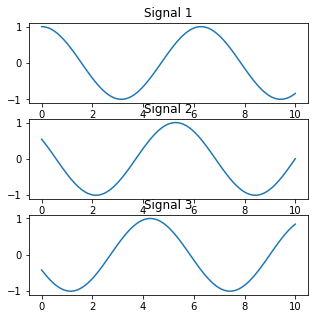

In [18]:
fig, axes = plt.subplots(3, 1, figsize=(5, 5))

for i, ax in enumerate(axes):
    ax.plot(x, y_data[i])
    ax.set_title(titles[i])

In [154]:
x = np.linspace(0, 10, 100)

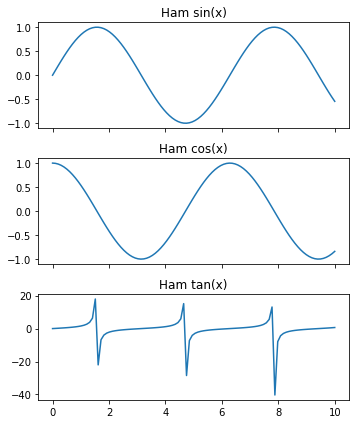

In [160]:
fig, ax = plt.subplots(3, 1, figsize=(5, 6), sharex=True)

ax[0].plot(x, np.sin(x))
ax[0].set_title("Ham sin(x)")

ax[1].plot(x, np.cos(x))
ax[1].set_title("Ham cos(x)")

ax[2].plot(x, np.tan(x))
ax[2].set_title("Ham tan(x)")

plt.tight_layout()

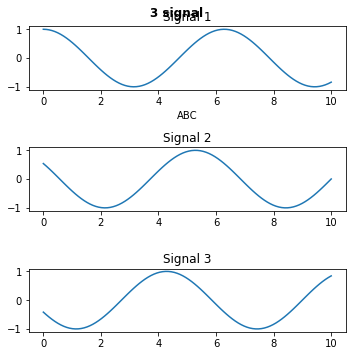

In [21]:
fig, axes = plt.subplots(3, 1, figsize=(5, 5))

axes[0].plot(x, y1)
axes[0].set_title(titles[0])
axes[0].set_xlabel("ABC")

axes[1].plot(x, y2)
axes[1].set_title(titles[1])

axes[2].plot(x, y3)
axes[2].set_title(titles[2])

fig.suptitle("3 signal", fontweight="bold")

fig.tight_layout()
plt.show()

In [22]:
a = [1, 2, 3]
b = ["a", "b", "c"]
c = [True, False, True]

In [23]:
list(zip(a, b, c))

[(1, 'a', True), (2, 'b', False), (3, 'c', True)]

In [24]:
for t1, t2, t3 in zip(a, b, c):
    print(t1, t2, t3)

1 a True
2 b False
3 c True


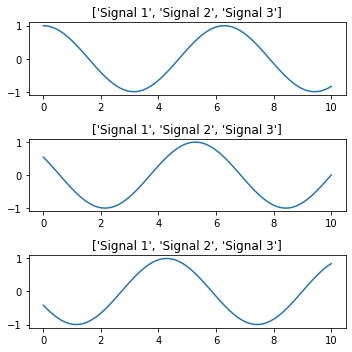

In [28]:
# Fig, Axes
fig, axes = plt.subplots(3, 1, figsize=(5, 5))

# Plot and decorate
for ax, y, title in zip(axes, (y1, y2, y3), titles): # iteration 1 ax = axes[0]
    ax.plot(x, y)
    ax.set_title(titles)
    
# Tight layout
fig.tight_layout()
plt.show()

### Example 2

In [161]:
# Set seed
np.random.seed(1)

# Randomly generate 2 samples from standard normal 
# (each have 100 points)
data = np.random.randn(2, 100)

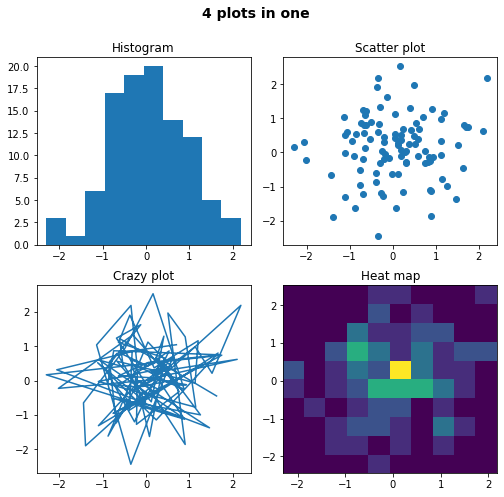

In [165]:
# Create a figure with 4 axes (4 subplots)
# Overal Figure has size of 5x5 inch
fig, axes = plt.subplots(2, 2, figsize=(7, 7), sharey=False)

# Subplot top left
axes[0, 0].hist(data[0])
axes[0, 0].set_title("Histogram")

# Subplot top right
axes[0, 1].scatter(data[0], data[1])
axes[0, 1].set_title("Scatter plot")

# Subplot bottom left
axes[1, 0].plot(data[0], data[1])
axes[1, 0].set_title("Crazy plot")

# Subplot bottom right
axes[1, 1].hist2d(data[0], data[1])
axes[1, 1].set_title("Heat map")

# # Set overall title for the figure
fig.suptitle("4 plots in one", fontsize=14, fontweight="bold")
fig.tight_layout() # Avoid overlap between subplots (try commenting this)

# # Make subplots only 88% of the canvas from the top to leave room for super title
fig.subplots_adjust(top=.88)

plt.show()

## 5. Further readings
- https://pbpython.com/effective-matplotlib.html
- https://github.com/matplotlib/AnatomyOfMatplotlib